In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df=pd.read_csv("/US_reviews.csv")
print(df.shape)

(52416, 9)


In [3]:
df.head()

,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating
0,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,We've been using airborne international courie...,5 stars
1,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,I had a good experience using Airborne Intnl C...,5 stars
2,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,I was truly shocked how quickly Mahendraji rep...,5 stars
3,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,They sent someone at home on Sunday. He packed...,5 stars
4,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,"I had to send a courier about 38 kgs to UK, as...",5 stars


In [4]:
df.dtypes

,0
Courier Name,object
Address,object
Pincode,int64
Overall Rating,float64
Review Count,float64
Reviewer Name,object
Review Date,object
Review,object
Reviewer Rating,object


# Exploratory Data Analysis (EDA)

# Create Categories to each topic

In [5]:
#Remove NAN
df = df.dropna(subset=['Review'])

In [6]:
#Define Keywords to each topic
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load pre-trained sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define categories with short descriptions
CATEGORIES = {
    'Delivery Time': 'Comments about delays, early or on-time delivery',
    'Customer Service': 'Feedback on staff behavior or customer support quality',
    'Tracking': 'Issues or compliments related to tracking the parcel',
    'Pricing': 'Concerns about cost, affordability or value for money',
    'Packaging': 'Feedback about package condition, boxes, or wrapping',
    'Pickup Service': 'Mentions about pickup experience or scheduling',
    'Website/App Experience': 'Experience using the logistics company website or app',
    'Product Handling': 'Care taken in handling the product',
    'Communication': 'Updates, calls, emails, or lack of communication',
    'Overall Experience': 'General sentiment about the whole experience'
}

# Precompute embeddings for category descriptions
category_names = list(CATEGORIES.keys())
category_embeddings = model.encode(list(CATEGORIES.values()), convert_to_tensor=True)

def categorize_with_nlp(review):
    if not isinstance(review, str) or not review.strip():
        return 'Uncategorized'
    review_embedding = model.encode(review, convert_to_tensor=True)
    similarity_scores = util.cos_sim(review_embedding, category_embeddings)[0]
    best_match_idx = similarity_scores.argmax().item()
    return category_names[best_match_idx]

def segment_reviews_nlp(df, review_column='review'):
    df['category'] = df[review_column].apply(categorize_with_nlp)
    return df

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
segment_reviews_nlp(df, review_column='Review')

,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category
0,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,We've been using airborne international courie...,5 stars,Website/App Experience
1,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,I had a good experience using Airborne Intnl C...,5 stars,Website/App Experience
2,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,I was truly shocked how quickly Mahendraji rep...,5 stars,Tracking
3,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,They sent someone at home on Sunday. He packed...,5 stars,Delivery Time
4,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,"I had to send a courier about 38 kgs to UK, as...",5 stars,Delivery Time
...,...,...,...,...,...,...,...,...,...,...
52406,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,krystall hurts,2 years ago,Excellent Service!! Highly RECOMMEND! ❤️❤️,5 stars,Website/App Experience
52407,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Mac Mill,2 years ago,Great service. Very professional,5 stars,Pickup Service
52408,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Allen Powell,2 years ago,Great company!!!,5 stars,Website/App Experience
52413,DHL Express Service Point,"962 Crescent Ave NE, Atlanta, GA 30309, United...",30306,4.3,29.0,Courtney Felinski,3 months ago,Naia and Kinaya were so incredibly helpful. I ...,5 stars,Website/App Experience


In [8]:
df['category'].value_counts()

,count
category,
Customer Service,10102
Pickup Service,8804
Delivery Time,6338
Tracking,5749
Product Handling,3187
Website/App Experience,2631
Packaging,2467
Overall Experience,1653
Communication,1102


In [9]:

df["Reviewer Rating"] = df["Reviewer Rating"].str.extract(r'(\d+)').astype(int)


In [10]:
df

,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category
0,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,We've been using airborne international courie...,5,Website/App Experience
1,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,I had a good experience using Airborne Intnl C...,5,Website/App Experience
2,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,I was truly shocked how quickly Mahendraji rep...,5,Tracking
3,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,They sent someone at home on Sunday. He packed...,5,Delivery Time
4,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,"I had to send a courier about 38 kgs to UK, as...",5,Delivery Time
...,...,...,...,...,...,...,...,...,...,...
52406,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,krystall hurts,2 years ago,Excellent Service!! Highly RECOMMEND! ❤️❤️,5,Website/App Experience
52407,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Mac Mill,2 years ago,Great service. Very professional,5,Pickup Service
52408,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Allen Powell,2 years ago,Great company!!!,5,Website/App Experience
52413,DHL Express Service Point,"962 Crescent Ave NE, Atlanta, GA 30309, United...",30306,4.3,29.0,Courtney Felinski,3 months ago,Naia and Kinaya were so incredibly helpful. I ...,5,Website/App Experience


In [11]:
#define a function to convert review rating to true_label
def star_to_sentiment(star):
    if star >= 4:
        return 'Positive'
    elif star == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
df['true_label'] = df['Reviewer Rating'].apply(star_to_sentiment)
df

,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category,true_label
0,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,We've been using airborne international courie...,5,Website/App Experience,Positive
1,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,I had a good experience using Airborne Intnl C...,5,Website/App Experience,Positive
2,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,I was truly shocked how quickly Mahendraji rep...,5,Tracking,Positive
3,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,They sent someone at home on Sunday. He packed...,5,Delivery Time,Positive
4,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,"I had to send a courier about 38 kgs to UK, as...",5,Delivery Time,Positive
...,...,...,...,...,...,...,...,...,...,...,...
52406,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,krystall hurts,2 years ago,Excellent Service!! Highly RECOMMEND! ❤️❤️,5,Website/App Experience,Positive
52407,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Mac Mill,2 years ago,Great service. Very professional,5,Pickup Service,Positive
52408,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Allen Powell,2 years ago,Great company!!!,5,Website/App Experience,Positive
52413,DHL Express Service Point,"962 Crescent Ave NE, Atlanta, GA 30309, United...",30306,4.3,29.0,Courtney Felinski,3 months ago,Naia and Kinaya were so incredibly helpful. I ...,5,Website/App Experience,Positive


In [13]:
df.dtypes

,0
Courier Name,object
Address,object
Pincode,int64
Overall Rating,float64
Review Count,float64
Reviewer Name,object
Review Date,object
Review,object
Reviewer Rating,int64
category,object


In [14]:
df.isna().sum()

,0
Courier Name,147
Address,147
Pincode,0
Overall Rating,147
Review Count,3204
Reviewer Name,11
Review Date,0
Review,0
Reviewer Rating,0
category,0


In [15]:
df.shape

(42785, 11)

In [16]:
#To clean junk characters
import re
import string

def clean_review(text):
    # Lowercase
    text = str(text).lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)

    # Remove non-ASCII characters (like emojis)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [17]:
df['Review'] = df['Review'].apply(clean_review)

In [18]:
df["Id"] = range(1, len(df) + 1)
df

,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category,true_label,Id
0,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,weve been using airborne international courier...,5,Website/App Experience,Positive,1
1,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,i had a good experience using airborne intnl c...,5,Website/App Experience,Positive,2
2,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,i was truly shocked how quickly mahendraji rep...,5,Tracking,Positive,3
3,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,they sent someone at home on sunday he packed ...,5,Delivery Time,Positive,4
4,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,i had to send a courier about kgs to uk as was...,5,Delivery Time,Positive,5
...,...,...,...,...,...,...,...,...,...,...,...,...
52406,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,krystall hurts,2 years ago,excellent service highly recommend,5,Website/App Experience,Positive,42781
52407,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Mac Mill,2 years ago,great service very professional,5,Pickup Service,Positive,42782
52408,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Allen Powell,2 years ago,great company,5,Website/App Experience,Positive,42783
52413,DHL Express Service Point,"962 Crescent Ave NE, Atlanta, GA 30309, United...",30306,4.3,29.0,Courtney Felinski,3 months ago,naia and kinaya were so incredibly helpful i c...,5,Website/App Experience,Positive,42784


In [19]:
# Move 'id' to the first column
df = df[['Id'] + [col for col in df.columns if col != 'Id']]

In [20]:
df.head()

,Id,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category,true_label
0,1,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,weve been using airborne international courier...,5,Website/App Experience,Positive
1,2,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,i had a good experience using airborne intnl c...,5,Website/App Experience,Positive
2,3,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,i was truly shocked how quickly mahendraji rep...,5,Tracking,Positive
3,4,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,they sent someone at home on sunday he packed ...,5,Delivery Time,Positive
4,5,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,i had to send a courier about kgs to uk as was...,5,Delivery Time,Positive


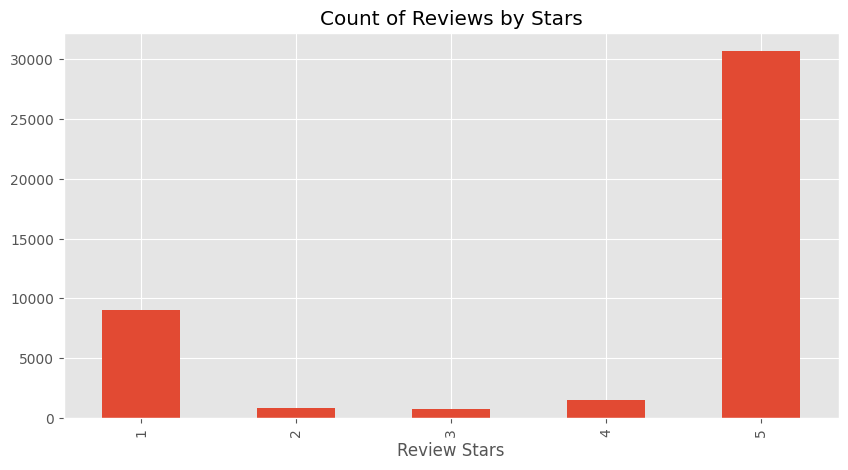

In [21]:
ax = df['Reviewer Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [22]:
example = df['Review'][10]
print(example)

i had an amazing experience with airborne international they delivered my diwali parcel all the way from india to canada in just days which was incredibly fast the entire process was straightforward and super convenient from booking to delivery everything delivered in perfect condition and their service exceeded my expectations i highly recommend them to anyone looking for reliable and efficient international shipping will definitely use their service again


In [23]:
df['true_label'].value_counts()

,count
true_label,
Positive,32148
Negative,9869
Neutral,768


In [24]:
# First, import nltk if you haven't already
import nltk

# Download the required punkt tokenizer data
nltk.download('punkt_tab')

# Now you can tokenize your text
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['i',
 'had',
 'an',
 'amazing',
 'experience',
 'with',
 'airborne',
 'international',
 'they',
 'delivered']

In [25]:
nltk.download('averaged_perceptron_tagger_eng')

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('i', 'NN'),
 ('had', 'VBD'),
 ('an', 'DT'),
 ('amazing', 'JJ'),
 ('experience', 'NN'),
 ('with', 'IN'),
 ('airborne', 'JJ'),
 ('international', 'JJ'),
 ('they', 'PRP'),
 ('delivered', 'VBD')]

In [26]:
import nltk

nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab') # Added this line
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


(S
  i/NN
  had/VBD
  an/DT
  amazing/JJ
  experience/NN
  with/IN
  airborne/JJ
  international/JJ
  they/PRP
  delivered/VBD
  my/PRP$
  diwali/NN
  parcel/IN
  all/PDT
  the/DT
  way/NN
  from/IN
  india/NN
  to/TO
  canada/VB
  in/IN
  just/RB
  days/NNS
  which/WDT
  was/VBD
  incredibly/RB
  fast/RB
  the/DT
  entire/JJ
  process/NN
  was/VBD
  straightforward/RB
  and/CC
  super/JJ
  convenient/NN
  from/IN
  booking/VBG
  to/TO
  delivery/NN
  everything/NN
  delivered/VBN
  in/IN
  perfect/JJ
  condition/NN
  and/CC
  their/PRP$
  service/NN
  exceeded/VBD
  my/PRP$
  expectations/NNS
  i/VBP
  highly/RB
  recommend/VB
  them/PRP
  to/TO
  anyone/NN
  looking/VBG
  for/IN
  reliable/JJ
  and/CC
  efficient/JJ
  international/JJ
  shipping/NN
  will/MD
  definitely/RB
  use/VB
  their/PRP$
  service/NN
  again/RB)


# Step 1. VADER Seniment Scoring

In [27]:
df['true_label'].value_counts()

,count
true_label,
Positive,32148
Negative,9869
Neutral,768


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [30]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9623}

In [31]:
# Run the polarity score on the entire dataset
from tqdm import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 42785/42785 [00:22<00:00, 1895.08it/s]


In [32]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [33]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category,true_label
0,1,0.000,0.914,0.086,0.4767,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,weve been using airborne international courier...,5,Website/App Experience,Positive
1,2,0.000,0.759,0.241,0.9565,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,i had a good experience using airborne intnl c...,5,Website/App Experience,Positive
2,3,0.053,0.731,0.217,0.8020,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,i was truly shocked how quickly mahendraji rep...,5,Tracking,Positive
3,4,0.000,0.741,0.259,0.9332,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,they sent someone at home on sunday he packed ...,5,Delivery Time,Positive
4,5,0.000,0.877,0.123,0.9403,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,i had to send a courier about kgs to uk as was...,5,Delivery Time,Positive


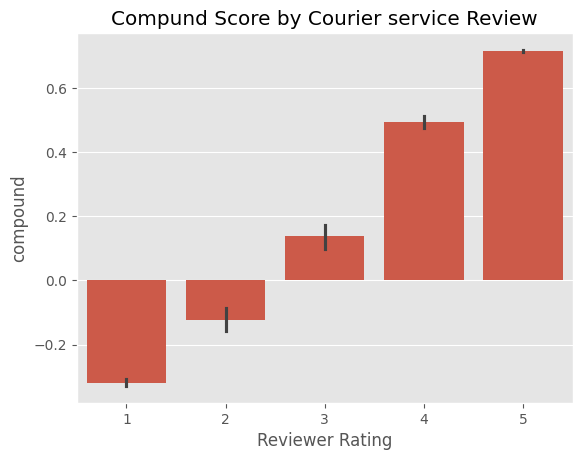

In [34]:
ax = sns.barplot(data=vaders, x='Reviewer Rating', y='compound')
ax.set_title('Compund Score by Courier service Review')
plt.show()

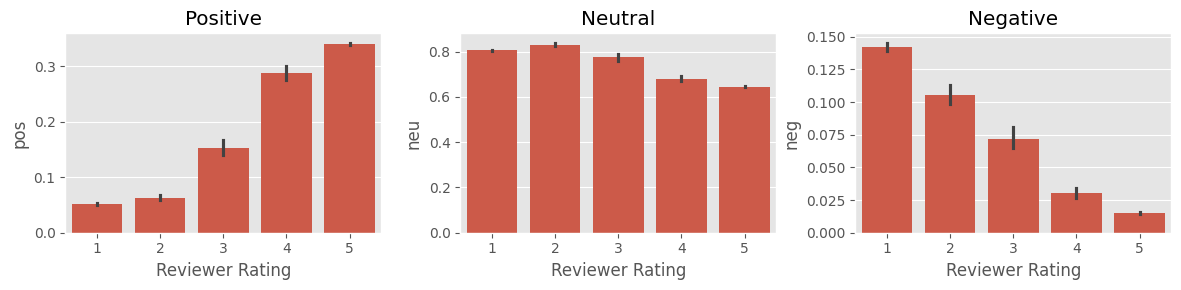

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Reviewer Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Reviewer Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Reviewer Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [36]:
def convert_compound_to_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [37]:
vaders['Vader_prediction'] = vaders['compound'].apply(convert_compound_to_sentiment)
vaders

,Id,neg,neu,pos,compound,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category,true_label,Vader_prediction
0,1,0.000,0.914,0.086,0.4767,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,weve been using airborne international courier...,5,Website/App Experience,Positive,Positive
1,2,0.000,0.759,0.241,0.9565,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,i had a good experience using airborne intnl c...,5,Website/App Experience,Positive,Positive
2,3,0.053,0.731,0.217,0.8020,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,i was truly shocked how quickly mahendraji rep...,5,Tracking,Positive,Positive
3,4,0.000,0.741,0.259,0.9332,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,they sent someone at home on sunday he packed ...,5,Delivery Time,Positive,Positive
4,5,0.000,0.877,0.123,0.9403,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,i had to send a courier about kgs to uk as was...,5,Delivery Time,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42780,42781,0.000,0.235,0.765,0.7574,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,krystall hurts,2 years ago,excellent service highly recommend,5,Website/App Experience,Positive,Positive
42781,42782,0.000,0.423,0.577,0.6249,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Mac Mill,2 years ago,great service very professional,5,Pickup Service,Positive,Positive
42782,42783,0.000,0.196,0.804,0.6249,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Allen Powell,2 years ago,great company,5,Website/App Experience,Positive,Positive
42783,42784,0.000,0.798,0.202,0.8344,DHL Express Service Point,"962 Crescent Ave NE, Atlanta, GA 30309, United...",30306,4.3,29.0,Courtney Felinski,3 months ago,naia and kinaya were so incredibly helpful i c...,5,Website/App Experience,Positive,Positive



# Accuracy

In [38]:
#To check the accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(vaders['true_label'], vaders['Vader_prediction'])
print("✅ VADER Accuracy:", round(accuracy * 100, 2), "%")

✅ VADER Accuracy: 85.92 %


In [39]:
from sklearn.metrics import classification_report

print(classification_report(vaders['true_label'], vaders['Vader_prediction']))

              precision    recall  f1-score   support

    Negative       0.88      0.67      0.76      9869
     Neutral       0.04      0.14      0.06       768
    Positive       0.92      0.93      0.93     32148

    accuracy                           0.86     42785
   macro avg       0.61      0.58      0.58     42785
weighted avg       0.90      0.86      0.87     42785



# Step 3. Roberta Pretrained Model


In [40]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [41]:
!pip install torch transformers
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [42]:
# VADER results on example
print(example)
sia.polarity_scores(example)

i had an amazing experience with airborne international they delivered my diwali parcel all the way from india to canada in just days which was incredibly fast the entire process was straightforward and super convenient from booking to delivery everything delivered in perfect condition and their service exceeded my expectations i highly recommend them to anyone looking for reliable and efficient international shipping will definitely use their service again


{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9623}

In [43]:
# # Run for Roberta Model
# # First install the required packages
# !pip install torch transformers scipy

# # Restart the kernel after installation (you'll need to do this manually)
# # After restarting, run the code below:

# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from scipy.special import softmax
# def polarity_scores_roberta(example):
#     encoded_text = tokenizer(example, return_tensors='pt')
#     output = model(**encoded_text)
#     scores = output[0][0].detach().numpy()
#     scores = softmax(scores)
#     scores_dict = {
#         'roberta_neg' : scores[0],
#         'roberta_neu' : scores[1],
#         'roberta_pos' : scores[2]
#     }
#     return scores_dict

# Install dependencies (run once)

!pip install torch transformers scipy vaderSentiment tqdm --quiet

import torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification

from scipy.special import softmax

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from tqdm import tqdm

import pandas as pd

# Load RoBERTa sentiment model

MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

model.eval()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [44]:
# res = {}
# for i, row in tqdm(df.iterrows(), total=len(df)):
#     try:
#         text = row['Review']
#         myid = row['Id']
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
#         roberta_result = polarity_scores_roberta(text)
#         df['roberta_prediction'] = df['Review'].apply(polarity_scores_roberta)
#         both = {**vader_result_rename, **roberta_result}
#         res[myid] = both
#     except RuntimeError:
#         print(f'Broke for id {myid}')

def polarity_scores_roberta(text):
    try:
        encoded_text = tokenizer(
            text,
            return_tensors='pt',
            truncation=True,
            max_length=512,
            padding=False
        )
        with torch.no_grad():
            output = model(**encoded_text)
        scores = softmax(output.logits[0].numpy())
        return {
            'roberta_neg': float(scores[0]),
            'roberta_neu': float(scores[1]),
            'roberta_pos': float(scores[2])
        }
    except Exception as e:
        print(f"RoBERTa error for text: {text[:100]}...\n{e}")
        return {'roberta_neg': None, 'roberta_neu': None, 'roberta_pos': None}


In [45]:
results = []

for i, row in tqdm(df.iterrows(), total=len(df)):

    text = str(row.get('Review', '')).strip()

    myid = row.get('Id', i)

    if not text:

        continue

    roberta_result = polarity_scores_roberta(text)

    combined = {'Id': myid, 'Review': text, **roberta_result}

    results.append(combined)


results_df = pd.DataFrame(results)



100%|██████████| 42785/42785 [1:30:58<00:00,  7.84it/s]


In [46]:
results_df

,Id,Review,roberta_neg,roberta_neu,roberta_pos
0,1,weve been using airborne international courier...,0.002147,0.049717,0.948136
1,2,i had a good experience using airborne intnl c...,0.001850,0.011975,0.986175
2,3,i was truly shocked how quickly mahendraji rep...,0.004485,0.021508,0.974008
3,4,they sent someone at home on sunday he packed ...,0.003008,0.038846,0.958147
4,5,i had to send a courier about kgs to uk as was...,0.013741,0.135743,0.850517
...,...,...,...,...,...
42778,42781,excellent service highly recommend,0.003362,0.027257,0.969380
42779,42782,great service very professional,0.004955,0.038292,0.956753
42780,42783,great company,0.007669,0.070779,0.921552
42781,42784,naia and kinaya were so incredibly helpful i c...,0.002048,0.011607,0.986345


In [47]:
# Define labeling function
def label_from_roberta(row):
    if pd.isnull(row['roberta_neg']) or pd.isnull(row['roberta_neu']) or pd.isnull(row['roberta_pos']):
        return 'unknown'
    scores = {
        'Negative': row['roberta_neg'],
        'Neutral': row['roberta_neu'],
        'Positive': row['roberta_pos']
    }
    return max(scores, key=scores.get)

# Apply labeling
results_df['roberta_label'] = results_df.apply(label_from_roberta, axis=1)



In [48]:
results_df

,Id,Review,roberta_neg,roberta_neu,roberta_pos,roberta_label
0,1,weve been using airborne international courier...,0.002147,0.049717,0.948136,Positive
1,2,i had a good experience using airborne intnl c...,0.001850,0.011975,0.986175,Positive
2,3,i was truly shocked how quickly mahendraji rep...,0.004485,0.021508,0.974008,Positive
3,4,they sent someone at home on sunday he packed ...,0.003008,0.038846,0.958147,Positive
4,5,i had to send a courier about kgs to uk as was...,0.013741,0.135743,0.850517,Positive
...,...,...,...,...,...,...
42778,42781,excellent service highly recommend,0.003362,0.027257,0.969380,Positive
42779,42782,great service very professional,0.004955,0.038292,0.956753,Positive
42780,42783,great company,0.007669,0.070779,0.921552,Positive
42781,42784,naia and kinaya were so incredibly helpful i c...,0.002048,0.011607,0.986345,Positive


# Append the data sets to the result of Roberta model

In [49]:
# Append the data sets to the result of Roberta model
results_df = results_df.merge(df, how='left')
results_df

,Id,Review,roberta_neg,roberta_neu,roberta_pos,roberta_label,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Reviewer Rating,category,true_label
0,1,weve been using airborne international courier...,0.002147,0.049717,0.948136,Positive,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,5,Website/App Experience,Positive
1,2,i had a good experience using airborne intnl c...,0.001850,0.011975,0.986175,Positive,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,5,Website/App Experience,Positive
2,3,i was truly shocked how quickly mahendraji rep...,0.004485,0.021508,0.974008,Positive,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,5,Tracking,Positive
3,4,they sent someone at home on sunday he packed ...,0.003008,0.038846,0.958147,Positive,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,5,Delivery Time,Positive
4,5,i had to send a courier about kgs to uk as was...,0.013741,0.135743,0.850517,Positive,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,5,Delivery Time,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42778,42781,excellent service highly recommend,0.003362,0.027257,0.969380,Positive,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,krystall hurts,2 years ago,5,Website/App Experience,Positive
42779,42782,great service very professional,0.004955,0.038292,0.956753,Positive,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Mac Mill,2 years ago,5,Pickup Service,Positive
42780,42783,great company,0.007669,0.070779,0.921552,Positive,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Allen Powell,2 years ago,5,Website/App Experience,Positive
42781,42784,naia and kinaya were so incredibly helpful i c...,0.002048,0.011607,0.986345,Positive,DHL Express Service Point,"962 Crescent Ave NE, Atlanta, GA 30309, United...",30306,4.3,29.0,Courtney Felinski,3 months ago,5,Website/App Experience,Positive


In [57]:
results_df.to_csv('Robertamodel_output1.csv')

# Accuracy of Roberta model

In [51]:

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(results_df['true_label'], results_df['roberta_label'])
print("✅ Roberta Accuracy:", round(accuracy * 100, 2), "%")

✅ Roberta Accuracy: 91.98 %


In [52]:
from sklearn.metrics import classification_report

print(classification_report(results_df['true_label'], results_df['roberta_label']))

              precision    recall  f1-score   support

    Negative       0.94      0.89      0.91      9869
     Neutral       0.08      0.27      0.12       768
    Positive       0.99      0.95      0.97     32146

    accuracy                           0.92     42783
   macro avg       0.67      0.70      0.67     42783
weighted avg       0.96      0.92      0.94     42783



In [53]:
df['Reviewer Rating'].value_counts()

,count
Reviewer Rating,
5,30680
1,9015
4,1468
2,854
3,768


In [56]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
results_df

,Id,neg,neu,pos,compound,Courier Name,Address,Pincode,Overall Rating,Review Count,Reviewer Name,Review Date,Review,Reviewer Rating,category,true_label
0,1,0.000,0.914,0.086,0.4767,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,pankaj singh,a month ago,weve been using airborne international courier...,5,Website/App Experience,Positive
1,2,0.000,0.759,0.241,0.9565,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Simi Samuel,3 months ago,i had a good experience using airborne intnl c...,5,Website/App Experience,Positive
2,3,0.053,0.731,0.217,0.8020,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Joslyn Carvalho,2 months ago,i was truly shocked how quickly mahendraji rep...,5,Tracking,Positive
3,4,0.000,0.741,0.259,0.9332,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Bhawana Sharma,3 months ago,they sent someone at home on sunday he packed ...,5,Delivery Time,Positive
4,5,0.000,0.877,0.123,0.9403,Airborne International Courier Services,"309 Apollo Complex, R.K. Singh Marg Parsi Panc...",14808,4.9,NaN,Meenal Morey (Maven Capital),5 months ago,i had to send a courier about kgs to uk as was...,5,Delivery Time,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42780,42781,0.000,0.235,0.765,0.7574,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,krystall hurts,2 years ago,excellent service highly recommend,5,Website/App Experience,Positive
42781,42782,0.000,0.423,0.577,0.6249,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Mac Mill,2 years ago,great service very professional,5,Pickup Service,Positive
42782,42783,0.000,0.196,0.804,0.6249,Attyre Delivery,attyredelivery.com,30306,4.5,24.0,Allen Powell,2 years ago,great company,5,Website/App Experience,Positive
42783,42784,0.000,0.798,0.202,0.8344,DHL Express Service Point,"962 Crescent Ave NE, Atlanta, GA 30309, United...",30306,4.3,29.0,Courtney Felinski,3 months ago,naia and kinaya were so incredibly helpful i c...,5,Website/App Experience,Positive


KeyError: 'vader_neg'

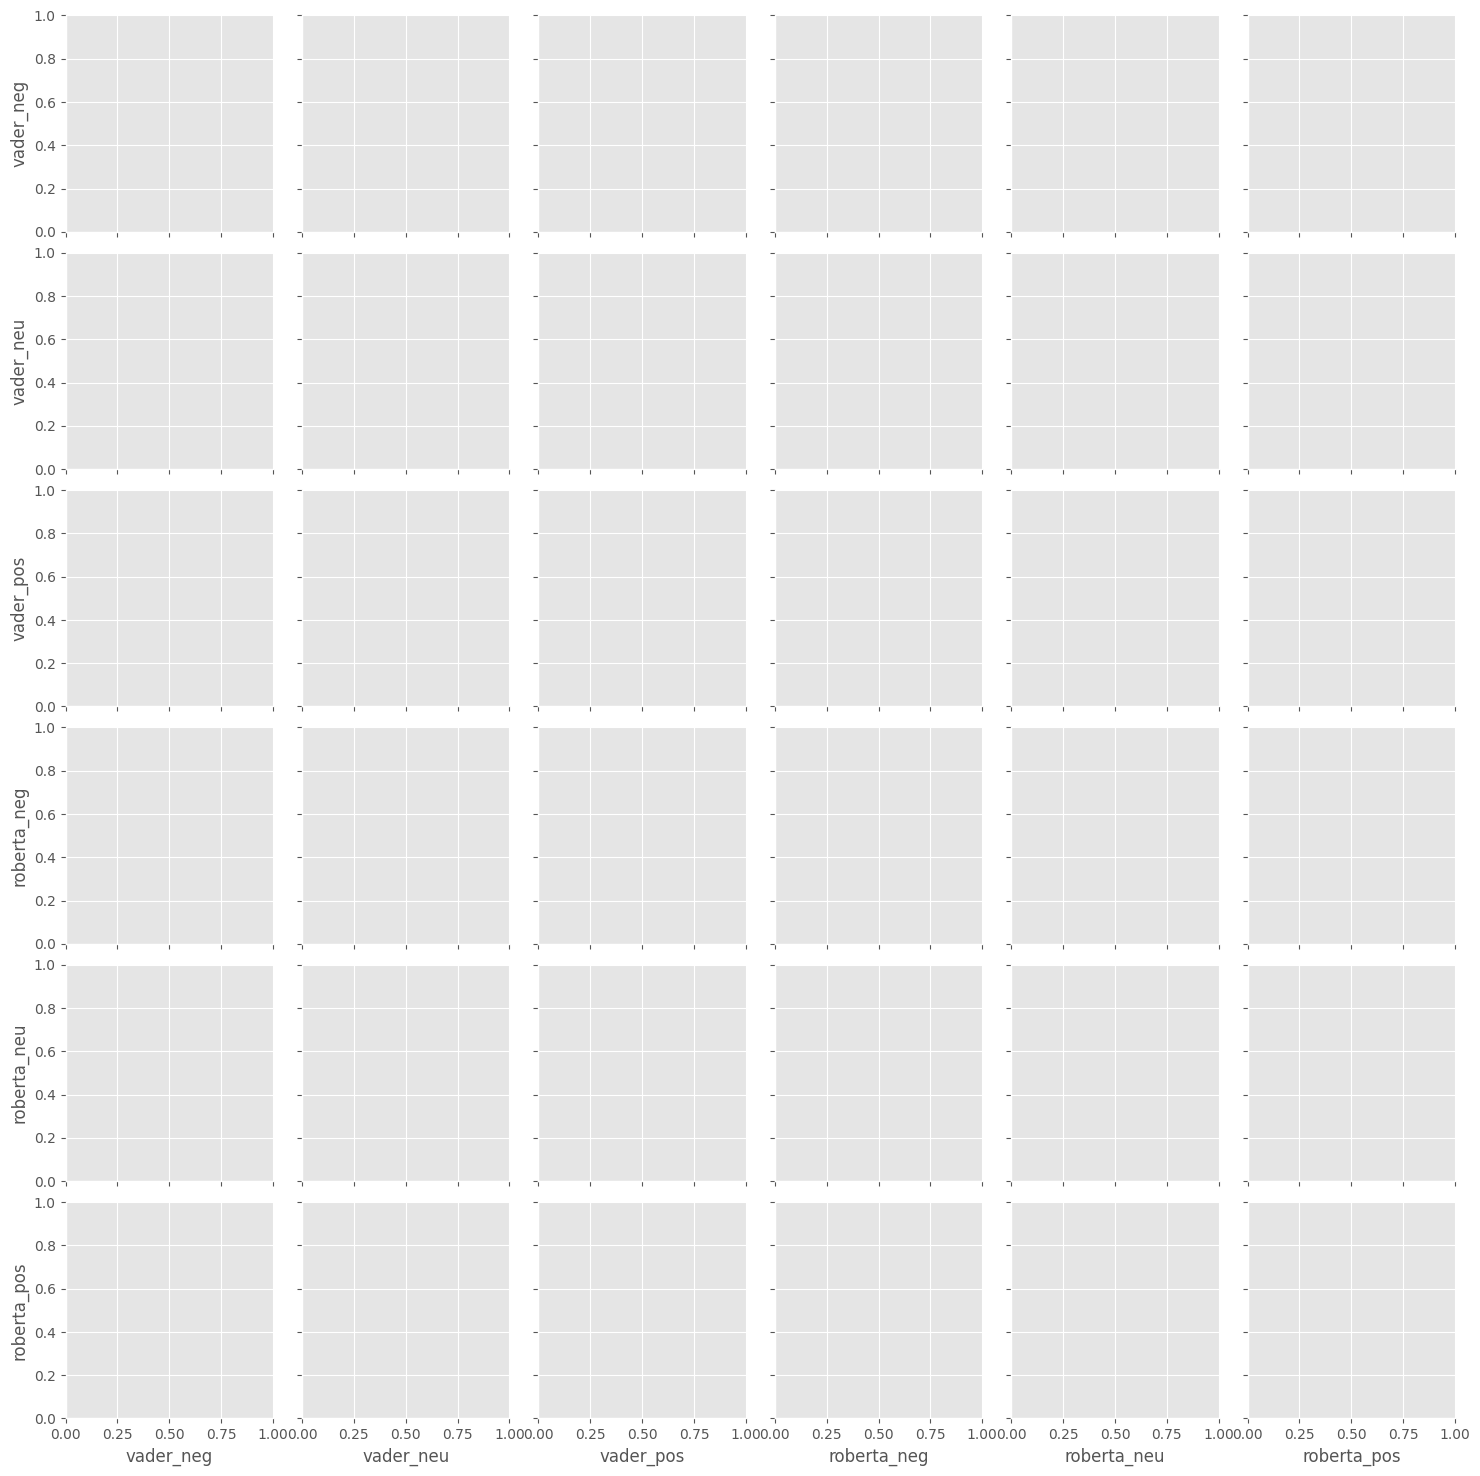

In [55]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Reviewer Rating',
            palette='tab10')
plt.show()

# Review Examples

In [ ]:
results_df.query('`Reviewer Rating` == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

In [ ]:
results_df.query('`Reviewer Rating` == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

In [ ]:
results_df.query('`Reviewer Rating` == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

In [ ]:
results_df.query('`Reviewer Rating` == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]